In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("transformed_housing_data_2.csv")

In [4]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()
# this is the simplest prediction model(our first model)
#but it predicts same price irrespective of the characteristic of the house

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

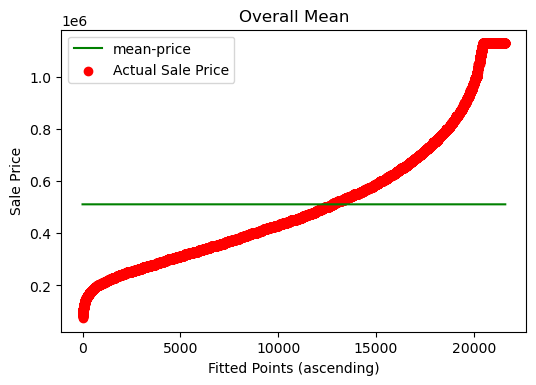

In [6]:
plt.figure(dpi = 100) #resolution
k = range(0, len(data)) #K(list) acts as index for the data
plt.scatter(k, data['Sale_Price'].sort_values(), color = 'red', label = 'Actual Sale Price')
plt.plot(k, data['mean_sales'].sort_values(), color = 'green', label = 'mean-price')
plt.xlabel('Fitted Points (ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend()

In [ ]:
# The "mean_price" is not a good predictor for very high & very low priced houses
# Let's predict the avg sale price acc to diff variables

# Improving the model

In [7]:
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [8]:
# making new column
data['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]

data['grade_mean'].head()

<ipython-input-8-127b18970e1d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [9]:
gradewise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    gradewise_list.append(k)

In [10]:
classwise_list = []
for i in range(1,11):
    k = data['Sale_Price'][data['Overall Grade'] == i]
    classwise_list.append(k)

In [11]:
plt.figure(dpi = 120, figsize = (15,9))

##### Plotting 'Sale_Price' Gradewise #####
# z variable is for x -axis
z = 0
for i in range(1,11):
    #defining x axis using z
    points = [k for k in range(z, z+ len(classwise_list[i-1]))]
    # plotting
    plt.scatter(points, classwise_list[i-1].sort_values(),
               label = ('houses with overall grade', i), s = 4o9oo0)
    #plotting gradewise mean
    plt.scatter( points,
               [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
               s = 6, color = 'orange'
               )
    z = max(points)+1
    
##### PLotting Overall Mean #####
plt.scatter([q for q in range(0,z)],
           data['mean_sales'],
           color = 'red',
           label = 'Overall Mean',
           s = 6)

plt.xlabel('Fitted Points (Ascending)')
plt.ylabel('Sale Price')
plt.title('Overall mean')
plt.legend(loc = 4)

SyntaxError: invalid syntax (<ipython-input-11-06ea1688c1c5>, line 11)

# Residual Plot

In [15]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

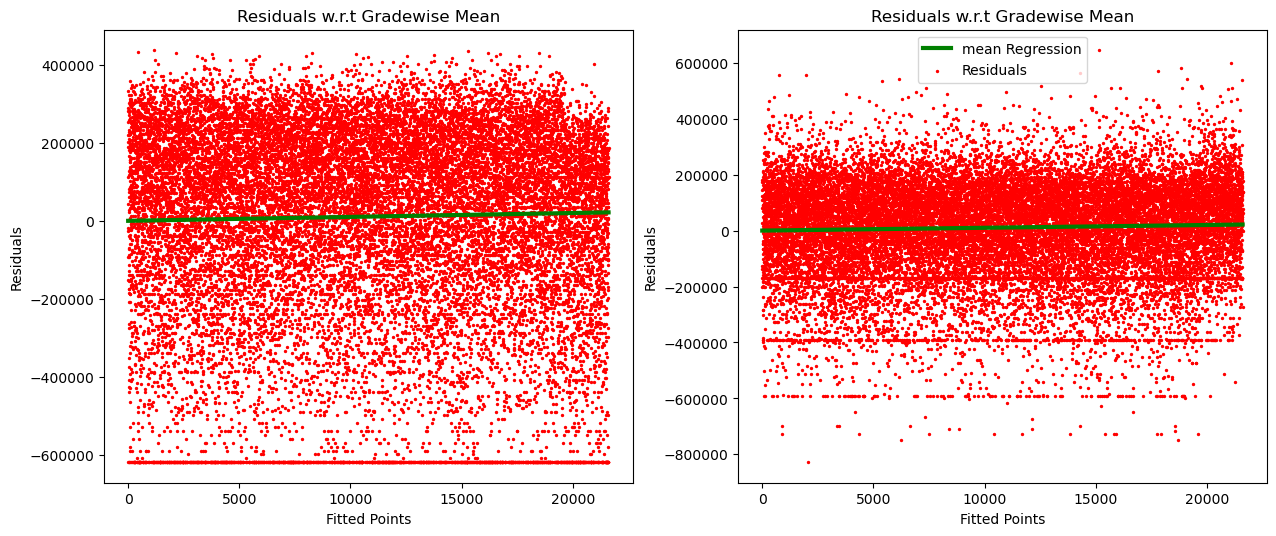

In [16]:
k = range(0, len(data)) #to create a list of indices for the data points
l = [0 for i in range(len(data))] #l is a list of zeroes which will represent the residual of a perfect model where the predictions are exactly the same as actuals and hence the residuals would be zero

plt.figure(figsize = (15,6), dpi = 100)

plt.subplot(1,2,1)
plt.scatter(k, mean_difference, color = 'red', label = 'Residuals', s =2) #(k --> X-axis), (mean_diff--> Y-axis)
plt.plot( k, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.title('Residuals w.r.t Gradewise Mean')

plt.subplot(1,2,2)
plt.scatter(k, grade_mean_difference, color = 'red', label = 'Residuals', s =2)
plt.plot( k, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted Points')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residuals w.r.t Gradewise Mean')

plt.legend()

In [ ]:
# the zero line representing residuals of a perfect model which would be zeroes
# the 1st model has a larger spread of residuals as compared to the 2nd model which means (2nd model is closure to 0 line, i.e, the(perfect model)..)


# Model Evaluation Matrix

In [17]:
cost = (sum(mean_difference)/len(data))
print(round(cost,7)) # rounding of to 7 decimal digits

0.0


In [ ]:
#using MAE

In [18]:
Y = data['Sale_Price']
Y_hat1 = data['mean_sales']
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n
#the length of all of them is same which means we are all set to calculate error

(21609, 21609, 21609, 21609)

In [19]:
cost_mean = sum(abs(Y_hat1 - Y)/len(data))
cost_mean #based on 1st regression model

199168.78146842003

In [20]:
cost_grade_mean = sum(abs(Y_hat2 - Y))/n
cost_grade_mean #based on 2nd regression model

137081.70298203363

In [21]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

In [ ]:
# using MSE

In [22]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1, Y)
cost_grade_mean = mean_squared_error(Y_hat2, Y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [ ]:
# using RMSE

In [23]:
cost_mean = mean_squared_error(Y_hat1, Y)**0.5
cost_grade_mean = mean_squared_error(Y_hat2, Y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [ ]:
# R**2 method

In [25]:
Y = data['Sale_Price']
Y_bar = data['mean_sales']
Y_hat = data['grade_mean']
n = len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [26]:
mse_mean = mean_squared_error(Y_bar, Y)
mse_mean

62528116847.799576

In [27]:
mse_model = mean_squared_error(Y_hat, Y)
mse_model

30804835720.342426

In [28]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836